In [25]:
from Training import DataCreateUpdated as dc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import random

# rec_paths = ["OpenBCI-RAW-2021-12-02_19-19-53.txt", 
#                 "OpenBCI-RAW-2021-12-02_19-31-12.txt", 
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_JawClench_2\OpenBCI-RAW-2022-02-16_19-30-28.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_LeftBlink_1\OpenBCI-RAW-2022-02-16_19-33-20.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_LeftBlink_2\OpenBCI-RAW-2022-02-16_19-39-23.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_RightBlink_1\OpenBCI-RAW-2022-02-16_19-42-03.txt"]
# label_paths = ["JawClench_labels_Ansh_12-02-21-1918.txt", 
#                 "JawClench_labels_Ansh_12-02-21-1930.txt", 
#                 "Recordings\Spring_2022\Evan_JawClench_1.txt",
#                 "Recordings\Spring_2022\Evan_LeftBlink_1.txt",
#                 "Recordings\Spring_2022\Evan_LeftBlink_2.txt",
#                 "Recordings\Spring_2022\Evan_RightBlink_1.txt"]
# label_types = ["JAW_CLENCH", 
#                 "JAW_CLENCH", 
#                 "JAW_CLENCH",
#                 "L_EYE",
#                 "L_EYE",
#                 "R_EYE"]


rec_paths = ["Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_2\OpenBCI-RAW-2022-03-23_20-43-17.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_1\OpenBCI-RAW-2022-03-23_20-41-22.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_1\OpenBCI-RAW-2022-03-23_20-37-06.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_2\OpenBCI-RAW-2022-03-23_20-39-04.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_1\OpenBCI-RAW-2022-03-23_20-33-09.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_2\OpenBCI-RAW-2022-03-23_20-34-58.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_1\OpenBCI-RAW-2022-03-23_20-21-37.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_2\OpenBCI-RAW-2022-03-23_20-25-30.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_1\OpenBCI-RAW-2022-03-23_20-27-22.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_2\OpenBCI-RAW-2022-03-23_20-29-16.txt"]

label_paths = ["Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_2\labels.txt"]

label_types = ["BROW_DOWN", "BROW_DOWN", "BROW_UP", "BROW_UP", "JAW_CLENCH", "JAW_CLENCH", "L_EYE", "L_EYE", "R_EYE", "R_EYE"]

#Chooses which input data to use
inputsToUse = np.arange(len(rec_paths))

In [26]:
# Data visualization for the sample data at index sdi
# Go to next block for actual code
def visualize_data(sdi):
    sample_obs = dc.getObservations(rec_paths[sdi], label_paths[sdi], 1000, [0,1,2,3], label_types[sdi])

    sample_y_channels_groups, sample_ind_groups, sample_t_groups, sample_l_groups = sample_obs
    
    na_ind = 0 #non-action
    a_ind = 0 #action

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.xlabel('mean_abs_dev')
    plt.ylabel('channel')

    colorgood = 'blue'
    colorbad = 'red'
    pos = -1
    for channel_groups in sample_y_channels_groups:
        pos = (pos+1)%4
        for i in range(channel_groups.shape[0]):
            if(sample_l_groups[i][0] == 1):
                color = colorbad
                if(random.randint(0, 2*na_ind) < 1):
                    na_ind = i
            else:
                color = colorgood
                if(random.randint(0, 2*a_ind) < 1):
                    a_ind = i
            plt.plot(np.mean(np.abs(channel_groups[i] - np.ones_like(channel_groups[i]) * np.mean(channel_groups[i]))), pos, 'x', color = color)
    
    plt.subplot(1,3,2)
    plt.xlabel('index - Action: ' + str(a_ind))
    plt.ylabel('voltage')
    plt.ylim(0, 2500)
    for channel_groups in sample_y_channels_groups:
        plt.plot(sample_ind_groups[a_ind], channel_groups[a_ind])


    plt.subplot(1,3,3)
    plt.xlabel('index - No Action: ' + str(na_ind))
    plt.ylabel('voltage')
    plt.ylim(0, 2500)
    for channel_groups in sample_y_channels_groups:
        plt.plot(sample_ind_groups[na_ind], channel_groups[na_ind])

In [27]:
# for input in inputsToUse:
#     visualize_data(input)


In [28]:
#added a fourier transform function
#add features from the fourier transform

def getMeanAbsDeviation(dchannel):
    return np.transpose(np.mean(np.abs(dchannel - np.mean(dchannel, axis=2, keepdims=True)), axis=2))

def getMean(dchannel):
    return np.transpose(np.mean(dchannel, axis=2))

def getPercentile(dchannel, percent):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getSpread(dchannel):
    return np.transpose(np.max(dchannel, axis=2) - np.min(dchannel, axis=2))

def getSpreadPercentile(dchannel, low, high):
    return getPercentile(dchannel, high) - getPercentile(dchannel, low)

def getFourier(dchannel):
    fourier = np.zeros(shape=(dchannel.shape[0],dchannel.shape[1],dchannel.shape[2]))
    for channel in range(dchannel.shape[0]):
        for sample in range(dchannel.shape[1]):
            thisFourier = np.fft.fft(dchannel[channel,sample])
            for index in range(thisFourier.shape[0]):
                fourier[channel,sample,index] = thisFourier[index]

    fourier = fourier[:,:,4:191]
    return fourier    

def getPeakCount(dchannel):
    ret = np.zeros((dchannel.shape[1], dchannel.shape[0]))
    for ch in range(dchannel.shape[0]):
        for sample in range(dchannel.shape[1]):
            count = 0
            for tind in range(4, dchannel.shape[2]-4):
                if(dchannel[ch, sample, tind] > dchannel[ch, sample, tind-1] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+1]
                and dchannel[ch, sample, tind] > dchannel[ch, sample, tind-2] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+2]
                and dchannel[ch, sample, tind] > dchannel[ch, sample, tind-3] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+3]
                and dchannel[ch, sample, tind] > dchannel[ch, sample, tind-4] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+4]):
                    count+=1
            ret[sample, ch] = count
    return ret


C:\Users\evanc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


9
(4, 71, 187)
(4, 71, 195)
(71, 6)
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[-742.61007666  258.64185686  -53.23592658  349.17907743 -407.46080226
  -93.25214026 -218.38008594  -47.40095368  153.03985546  -89.05983338
   86.42043368 -207.97703168  -58.04202402  -27.93301794  251.58433965
  183.9506872   279.8787618   -50.24307829  -34.74443101  -22.52182935
   84.84601305   64.87157048 -137.10610246  -59.87905425   16.33594967
  -56.56705232  115.49307281  -57.80367049  128.17836882  -22.89892342
   53.49013688  -79.01769496 -132.28996425  203.91661354  128.79438805
   56.79825887 -110.08601773  132.59934911   -

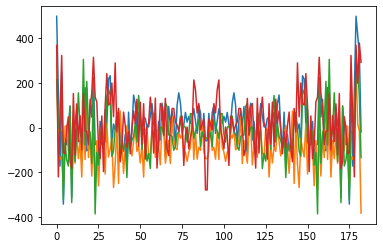

In [29]:
# Loads in X and Y
XMean = None
XMeanDev = None
X90 = None
X10 = None
Peaks = None
y = None
Fourier = None
channelGroup = None
ychan = None
lGroup = None
for i in inputsToUse:
    obs = dc.getObservations(rec_paths[i], label_paths[i], 1000, [0,1,2,3], label_types[i])
    y_channels_groups, ind_groups, t_groups, l_groups = obs
    if XMean is not None:
        XMean = np.concatenate((XMean, getMean(y_channels_groups)))
        XMeanDev = np.concatenate((XMeanDev, getMeanAbsDeviation(y_channels_groups)))
        X90 = np.concatenate((X90, getPercentile(y_channels_groups, 90)))
        X10 = np.concatenate((X10, getPercentile(y_channels_groups, 10)))
        Peaks = np.concatenate((Peaks, getPeakCount(y_channels_groups)))
        y = np.concatenate((y, l_groups))
    else:
        XMean = getMean(y_channels_groups)
        XMeanDev = getMeanAbsDeviation(y_channels_groups)
        X90 = getPercentile(y_channels_groups, 90)
        X10 = getPercentile(y_channels_groups, 10)
        Peaks = getPeakCount(y_channels_groups)
        Fourier = getFourier(y_channels_groups)
        channelGroup = y_channels_groups
        ychan = y_channels_groups
        lGroup = l_groups
        y = l_groups
        
# plt.plot(y_channels_groups[1][0])

print(i)

obs = dc.getObservations(rec_paths[i], label_paths[i], 1000, [0,1,2,3], label_types[i])
y_channels_groups, ind_groups, t_groups, l_groups = obs



print(Fourier.shape)
print(channelGroup.shape)
print(lGroup.shape)
print(lGroup[:20])

print(Fourier[2][0])

Fourier = Fourier[:,:,4:190]

for i in range(4):
    plt.plot(Fourier[i][16])

for i in range(4):
    plt.plot(Fourier[i][16])



# featureList = [XMean, XMeanDev]
# featureList = [XMeanDev, XMean, Peaks]
# for feature in featureList:
#     if(X is None):
#         X = feature
#     else:
#         X = np.concatenate((X, feature), axis=1)

# print(X.shape, y.shape)



In [30]:
#test-train split
from sklearn.model_selection import train_test_split

X_res, X_test, y_res, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)

NameError: name 'X' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE

def oversample(X, y):
    X_combined = np.concatenate((X, y), axis=1)
    over_sampler = SMOTE(random_state=4)
    X_combined, _ = over_sampler.fit_resample(X_combined, np.argmax(y, axis=1))
    X_res = X_combined[:, 0:X.shape[1]]
    y_res = X_combined[:, X.shape[1]:X_combined.shape[1]]
    return X_res, y_res

# Over Sampling
X_res, y_res = oversample(X_res, y_res)
X_test, y_test = oversample(X_test, y_test)


# Under Sampling
# from imblearn.under_sampling import RandomUnderSampler
# under_sampler = RandomUnderSampler(sampling_strategy = 'majority', random_state=42, replacement = True)
# print(X.shape, y.shape)
# X_res, y_res = under_sampler.fit_resample(X_combined, np.argmax(y, axis=1))
# print(X_res.shape, y_res.shape)
# X = X_res[:, 0:X.shape[1]]
# y = X_res[:, X.shape[1]:X_res.shape[1]]

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# # Create as many classifiers as needed
# classifiers = []
# for i in range(0, num_enabled):
#     classifiers.append(svm.SVC(probability=True))
#     classifiers[i].fit(X_res, y_res[:,i])

from sklearn.neighbors import KNeighborsClassifier

# svm_classifier = svm.SVC()
# svm_classifier.fit(X_res, np.argmax(y_res, axis=1))

knn_classifier = KNeighborsClassifier(3)
knn_classifier.fit(X_res, np.argmax(y_res, axis=1))


SVC()

Results (KNN): 
Recall: 	 [0.84810127 0.63924051 0.67088608 0.83544304 0.71518987 0.75316456]
Precision: 	 [0.39528024 0.90990991 0.94642857 0.94285714 0.92622951 0.95967742]
Accuracy:	 0.7436708860759493


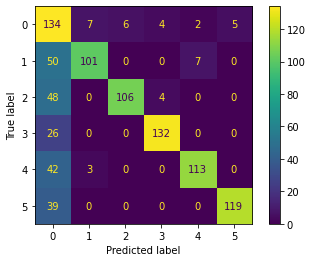

In [ ]:
import sklearn

X_eval = X_test
y_eval = y_test

# predictions = svm_classifier.predict(X_eval)
# recall = sklearn.metrics.recall_score(np.argmax(y_eval, axis=1), predictions, average=None)
# precision = sklearn.metrics.precision_score(np.argmax(y_eval, axis=1), predictions, average=None)
# accuracy = sklearn.metrics.accuracy_score(np.argmax(y_eval, axis=1), predictions)
# print("Results (SVM): ")
# print("Recall:", recall)
# print("Precision:", precision)
# print("Accuracy:", accuracy)
# print("\n")

predictions = knn_classifier.predict(X_eval)
recall = sklearn.metrics.recall_score(np.argmax(y_eval, axis=1), predictions, average=None)
precision = sklearn.metrics.precision_score(np.argmax(y_eval, axis=1), predictions, average=None)
accuracy = sklearn.metrics.accuracy_score(np.argmax(y_eval, axis=1), predictions)
print("Results (KNN): ")
print("Recall: \t", recall)
print("Precision: \t", precision)
print("Accuracy:\t", accuracy)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(np.argmax(y_eval, axis=1), predictions)

In [ ]:
# correct = 0
# total = 0

# enabledClassifiers = np.arange(0, y.shape[1])[:num_enabled]
# RecallRate = np.zeros([num_enabled, 2])
# Precision = np.zeros([num_enabled, 2])

# # Comment this to test on all data
# # X = X_test
# # y = y_test

# for i in range(X.shape[0]):
#     # if you want to make it more or less likely to predict no action change the threshold to a larger/smaller value
#     maxVal = 0.5
#     maxInd = 0

#     #Enable as many classifiers as you need to
#     for c in range(1, len(classifiers)):
#         if(classifiers[c].predict_proba(X[i].reshape(1, -1))[0][1]>maxVal):
#             maxVal = classifiers[c].predict_proba(X[i].reshape(1, -1))[0][1]
#             maxInd = c

# #Getting Precision and Recall Data
#     if(y[i][maxInd]==1):
#         correct+=1
#         Precision[maxInd][0]+=1
#         RecallRate[maxInd][0]+=1
#     for xx in range(num_enabled):
#         if(y[i][xx]==1):
#             RecallRate[xx][1]+=1
#     total+=1
#     Precision[maxInd][1]+=1
# print(correct/total)
# print("Recall")
# for row in RecallRate:
#     print(row, row[0]/row[1])
# print("Precision")
# for row in Precision:
#     print(row, row[0]/row[1])